In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
df=pd.read_csv("/content/crop_recommendation_csv.csv")
print(df.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


### Data Cleaning

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#check null values
print(df.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [10]:
#check duplicates
print(df.duplicated().sum())

0


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2199 non-null   int64  
 1   P            2199 non-null   int64  
 2   K            2199 non-null   int64  
 3   temperature  2199 non-null   float64
 4   humidity     2199 non-null   float64
 5   ph           2199 non-null   float64
 6   rainfall     2199 non-null   float64
 7   label        2199 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


<Axes: >

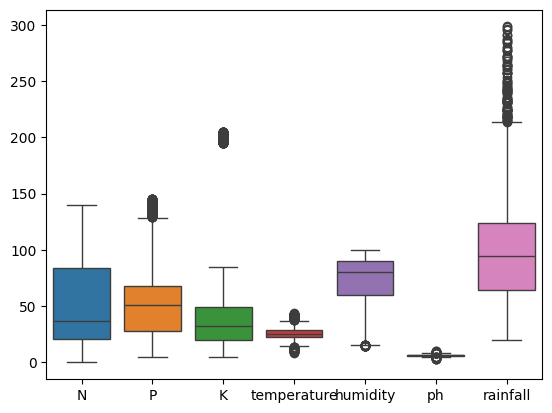

In [12]:
#check outlier
sns.boxplot(df)

In [13]:
#remove oulier use clipping method
#total 295 outlier found in P column
q1=df['P'].quantile(0.25)
q3=df['P'].quantile(0.75)
iqr=q3-q1
upper=q1+1.5*iqr
lower=q3-1.5*iqr
outlier=df.loc[(df['P']>upper)|(df['P']<lower)]
print(len(outlier))

295


In [14]:
df.loc[df['P']>upper,'P']=upper
df.loc[df['P']<lower,'P']=lower


In [15]:
#remove outlier in K column
q1=df['K'].quantile(0.25)
q3=df['K'].quantile(0.75)
iqr=q3-q1
upper=q1+1.5*iqr
lower=q3-1.5*iqr
outlier=df.loc[(df['K']>upper)|(df['K']<lower)]
print(len(outlier))
df.loc[df['K']>upper,'K']=upper
df.loc[df['K']<lower,'K']=lower

308


/tmp/ipython-input-2242235112.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '63.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['K']>upper,'K']=upper


In [16]:
#remove outlier in temperature column
q1=df['temperature'].quantile(0.25)
q3=df['temperature'].quantile(0.75)
iqr=q3-q1
upper=q1+1.5*iqr
lower=q3-1.5*iqr
outlier=df.loc[(df['temperature']>upper)|(df['temperature']<lower)]
print(len(outlier))
df.loc[df['temperature']>upper,'temperature']=upper
df.loc[df['temperature']<lower,'temperature']=lower

496


In [17]:
#remove outlier in humidity column
q1=df['humidity'].quantile(0.25)
q3=df['humidity'].quantile(0.75)
iqr=q3-q1
upper=q1+1.5*iqr
lower=q3-1.5*iqr
outlier=df.loc[(df['humidity']>upper)|(df['humidity']<lower)]
print(len(outlier))
df.loc[df['humidity']>upper,'humidity']=upper
df.loc[df['humidity']<lower,'humidity']=lower

267


In [18]:
#remove outlier in ph column
q1=df['ph'].quantile(0.25)
q3=df['ph'].quantile(0.75)
iqr=q3-q1
upper=q1+1.5*iqr
lower=q3-1.5*iqr
outlier=df.loc[(df['ph']>upper)|(df['ph']<lower)]
print(len(outlier))
df.loc[df['ph']>upper,'ph']=upper
df.loc[df['ph']<lower,'ph']=lower

347


In [19]:
#remove outlier in rainfall column
q1=df['rainfall'].quantile(0.25)
q3=df['rainfall'].quantile(0.75)
iqr=q3-q1
upper=q1+1.5*iqr
lower=q3-1.5*iqr
outlier=df.loc[(df['rainfall']>upper)|(df['rainfall']<lower)]
print(len(outlier))
df.loc[df['rainfall']>upper,'rainfall']=upper
df.loc[df['rainfall']<lower,'rainfall']=lower

515


<Axes: >

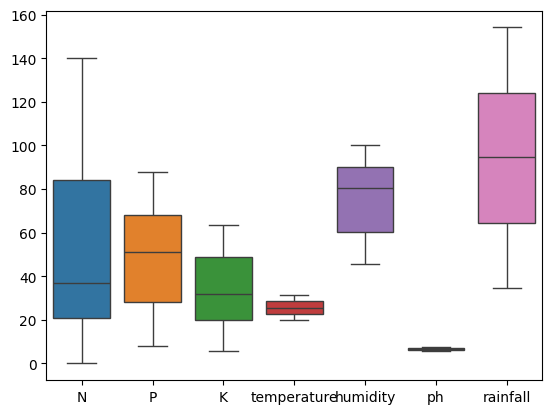

In [20]:
#outlier are removed in all column
sns.boxplot(df)

In [21]:
numeric=df.select_dtypes(include='number')
for column in numeric.columns:
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    upper=q1+1.5*iqr
    lower=q3-1.5*iqr
    outlier=df.loc[(df[column]>upper)|(df[column]<lower)]
    print(len(outlier))
    df.loc[df[column]>upper,column]=upper
    df.loc[df[column]<lower,column]=lower

111
0
0
0
0
0
0


/tmp/ipython-input-1045128258.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '115.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[column]>upper,column]=upper


<Axes: >

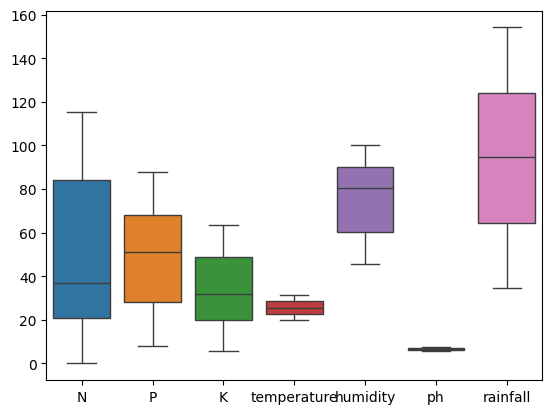

In [22]:
sns.boxplot(df)

### Exploratory Data Analysis

In [23]:
print(df)

          N   P     K  temperature   humidity        ph    rainfall   label
0      90.0  42  43.0    20.879744  82.002744  6.502985  154.060833    rice
1      85.0  58  41.0    21.770462  80.319644  7.038096  154.060833    rice
2      60.0  55  44.0    23.004459  82.320763  7.399878  154.060833    rice
3      74.0  35  40.0    26.491096  80.158363  6.980401  154.060833    rice
4      78.0  42  42.0    20.130175  81.604873  7.399878  154.060833    rice
...     ...  ..   ...          ...        ...       ...         ...     ...
2194   97.0  35  26.0    24.914610  53.741447  6.334610  154.060833  coffee
2195  107.0  34  32.0    26.774637  66.413269  6.780064  154.060833  coffee
2196   99.0  15  27.0    27.417112  56.636362  6.086922  127.924610  coffee
2197  115.5  33  30.0    24.131797  67.225123  6.362608  154.060833  coffee
2198  104.0  18  30.0    23.603016  60.396475  6.779833  140.937041  coffee

[2199 rows x 8 columns]


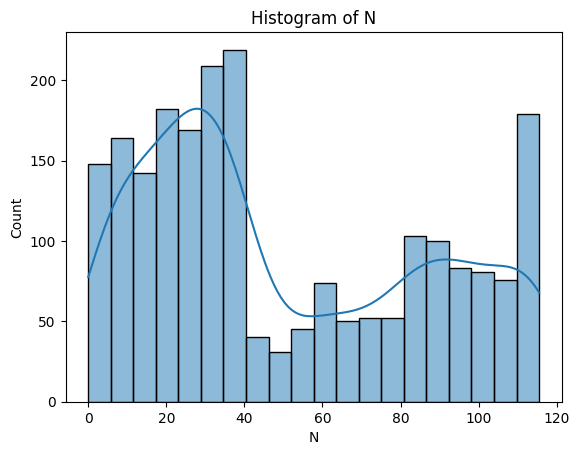

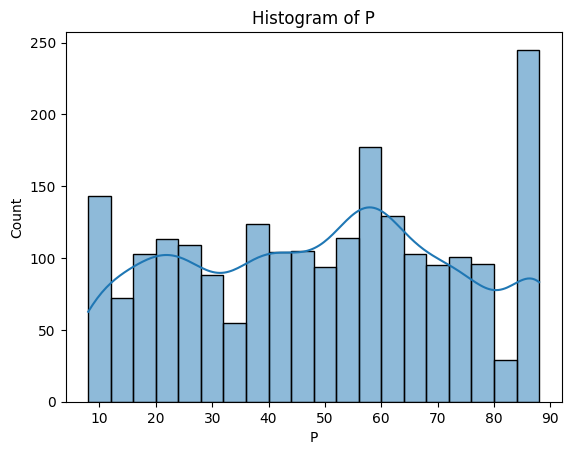

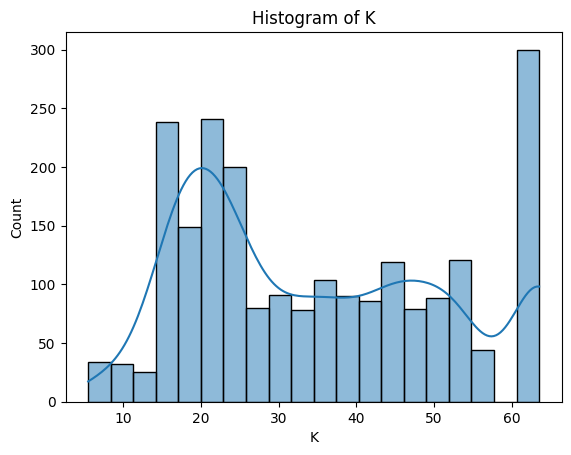

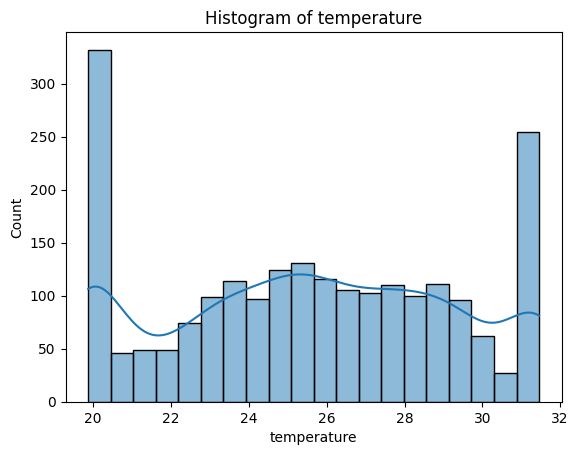

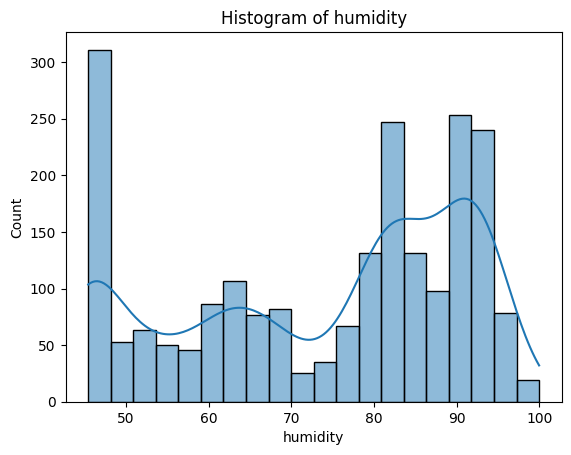

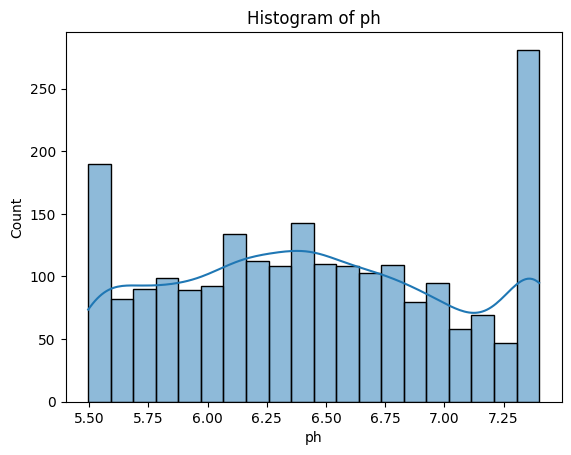

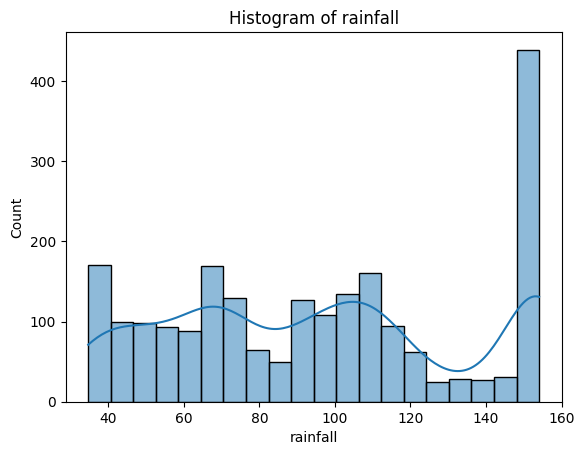

In [24]:
import matplotlib.pyplot as plt
for column in numeric:
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()


<Axes: >

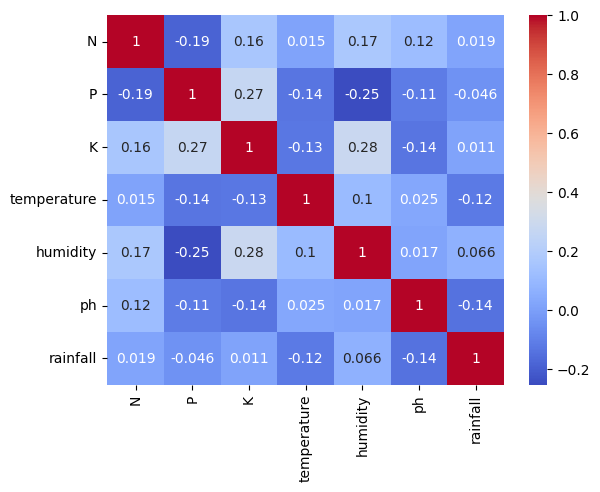

In [25]:
corr=numeric.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

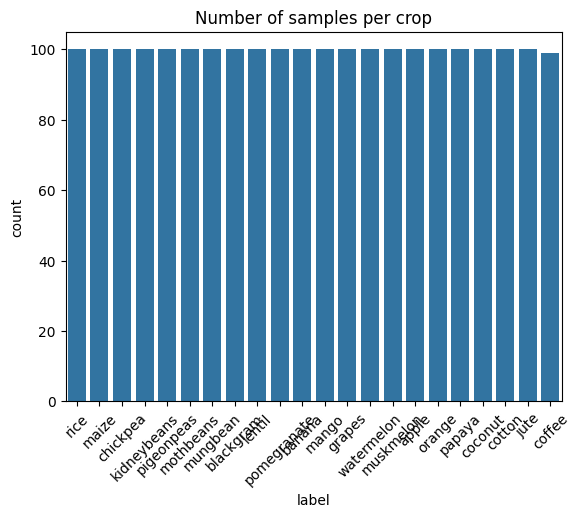

In [26]:
sns.countplot(x='label', data=df)
plt.xticks(rotation=45)
plt.title('Number of samples per crop')
plt.show()


Text(0, 0.5, 'humidity')

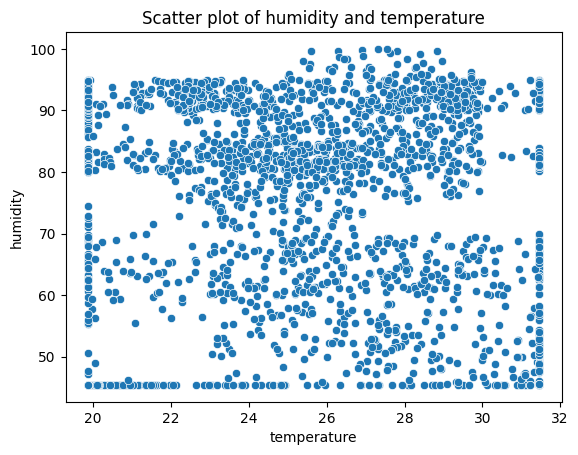

In [27]:
plt.title("Scatter plot of humidity and temperature")
sns.scatterplot(x='temperature',y='humidity',data=df)
plt.xlabel('temperature')
plt.ylabel('humidity')

Text(0.5, 1.0, 'Scatter plot of rainfall column and temperature column')

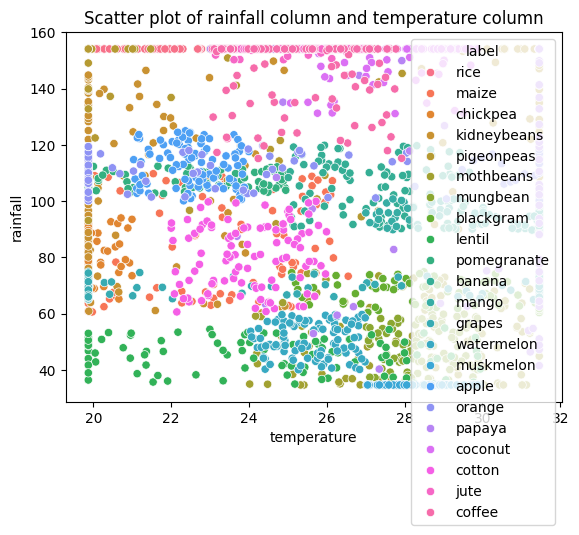

In [28]:
sns.scatterplot(x='temperature',y='rainfall',data=df,hue='label')
plt.title('Scatter plot of rainfall column and temperature column')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'rice'),
  Text(1, 0, 'maize'),
  Text(2, 0, 'chickpea'),
  Text(3, 0, 'kidneybeans'),
  Text(4, 0, 'pigeonpeas'),
  Text(5, 0, 'mothbeans'),
  Text(6, 0, 'mungbean'),
  Text(7, 0, 'blackgram'),
  Text(8, 0, 'lentil'),
  Text(9, 0, 'pomegranate'),
  Text(10, 0, 'banana'),
  Text(11, 0, 'mango'),
  Text(12, 0, 'grapes'),
  Text(13, 0, 'watermelon'),
  Text(14, 0, 'muskmelon'),
  Text(15, 0, 'apple'),
  Text(16, 0, 'orange'),
  Text(17, 0, 'papaya'),
  Text(18, 0, 'coconut'),
  Text(19, 0, 'cotton'),
  Text(20, 0, 'jute'),
  Text(21, 0, 'coffee')])

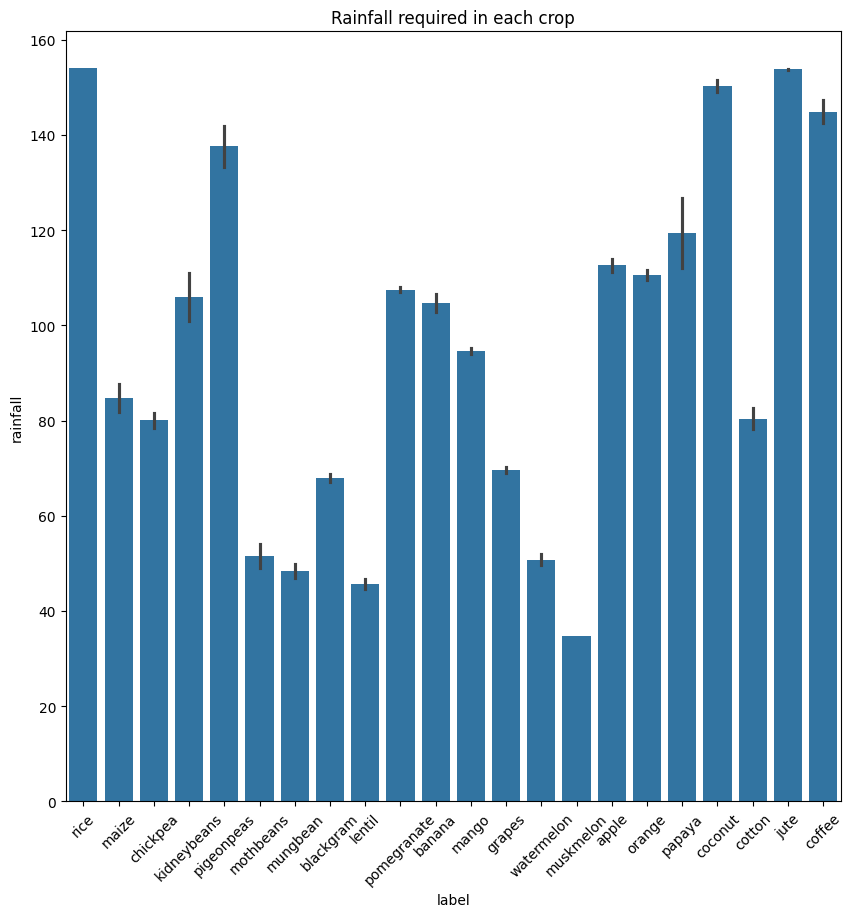

In [29]:
plt.figure(figsize=(10,10))
sns.barplot(x='label',y='rainfall',data=df)
plt.title('Rainfall required in each crop')

plt.xticks(rotation=45)


In [30]:
print(df)

          N   P     K  temperature   humidity        ph    rainfall   label
0      90.0  42  43.0    20.879744  82.002744  6.502985  154.060833    rice
1      85.0  58  41.0    21.770462  80.319644  7.038096  154.060833    rice
2      60.0  55  44.0    23.004459  82.320763  7.399878  154.060833    rice
3      74.0  35  40.0    26.491096  80.158363  6.980401  154.060833    rice
4      78.0  42  42.0    20.130175  81.604873  7.399878  154.060833    rice
...     ...  ..   ...          ...        ...       ...         ...     ...
2194   97.0  35  26.0    24.914610  53.741447  6.334610  154.060833  coffee
2195  107.0  34  32.0    26.774637  66.413269  6.780064  154.060833  coffee
2196   99.0  15  27.0    27.417112  56.636362  6.086922  127.924610  coffee
2197  115.5  33  30.0    24.131797  67.225123  6.362608  154.060833  coffee
2198  104.0  18  30.0    23.603016  60.396475  6.779833  140.937041  coffee

[2199 rows x 8 columns]


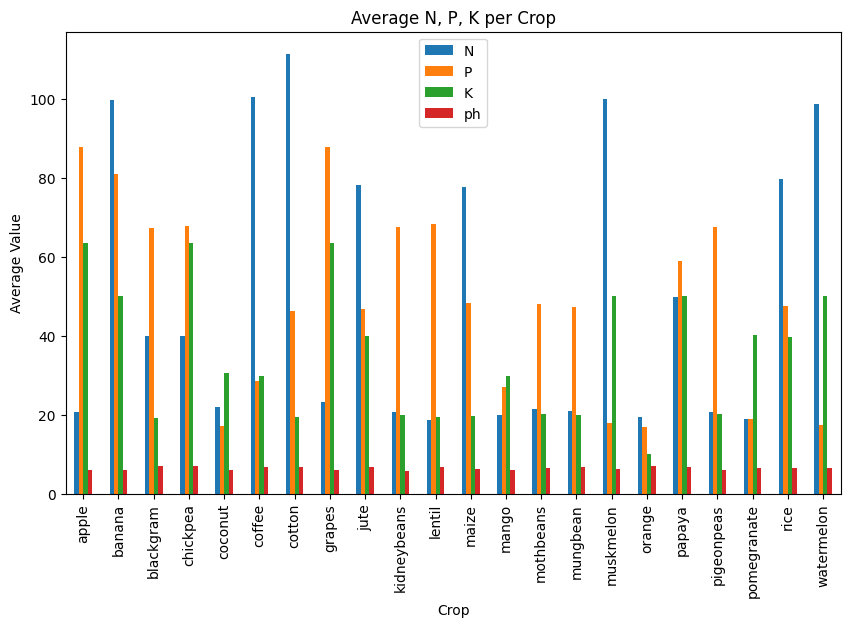

In [31]:

avg_nutrients = df.groupby('label')[['N','P','K','ph']].mean()


avg_nutrients.plot(kind='bar', figsize=(10,6))
plt.title('Average N, P, K per Crop')
plt.xlabel('Crop')
plt.ylabel('Average Value')
plt.xticks(rotation=90)
plt.show()


In [32]:
print(df.describe())

                 N            P            K  temperature     humidity  \
count  2199.000000  2199.000000  2199.000000  2199.000000  2199.000000   
mean     50.175307    49.263756    34.995907    25.569860    74.046826   
std      36.218420    24.151337    16.723572     3.691310    17.058852   
min       0.000000     8.000000     5.500000    19.871685    45.429389   
25%      21.000000    28.000000    20.000000    22.768393    60.273103   
50%      37.000000    51.000000    32.000000    25.597049    80.474764   
75%      84.000000    68.000000    49.000000    28.561810    89.960531   
max     115.500000    88.000000    63.500000    31.458518    99.981876   

                ph     rainfall  
count  2199.000000  2199.000000  
mean      6.450298    95.877280  
std       0.590859    39.090249  
min       5.495471    34.705788  
25%       5.971573    64.544549  
50%       6.424671    94.781896  
75%       6.923776   124.222072  
max       7.399878   154.060833  


### Hypothesis testing

In [33]:
print(df)

          N   P     K  temperature   humidity        ph    rainfall   label
0      90.0  42  43.0    20.879744  82.002744  6.502985  154.060833    rice
1      85.0  58  41.0    21.770462  80.319644  7.038096  154.060833    rice
2      60.0  55  44.0    23.004459  82.320763  7.399878  154.060833    rice
3      74.0  35  40.0    26.491096  80.158363  6.980401  154.060833    rice
4      78.0  42  42.0    20.130175  81.604873  7.399878  154.060833    rice
...     ...  ..   ...          ...        ...       ...         ...     ...
2194   97.0  35  26.0    24.914610  53.741447  6.334610  154.060833  coffee
2195  107.0  34  32.0    26.774637  66.413269  6.780064  154.060833  coffee
2196   99.0  15  27.0    27.417112  56.636362  6.086922  127.924610  coffee
2197  115.5  33  30.0    24.131797  67.225123  6.362608  154.060833  coffee
2198  104.0  18  30.0    23.603016  60.396475  6.779833  140.937041  coffee

[2199 rows x 8 columns]


In [34]:
print(df['label'].unique())

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [35]:
#Null Hypothesis (H₀):
#There is no significant difference in mean Rainfall between Rice and Coffee.

#Alternate Hypothesis (H₁):
#There is a significant difference in mean Rainfall between Rice and Coffee.
from statsmodels.stats.weightstats import ztest
rice = df[df['label']=='rice']['rainfall']
coffee = df[df['label']=='coffee']['rainfall']

z_stat, p_value = ztest(rice, coffee)

print(p_value)
if p_value < 0.05:
    print("Reject Null Hypothesis → Accept Alternate Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")


1.7401999007815932e-13
Reject Null Hypothesis → Accept Alternate Hypothesis


In [36]:
#Null hypothesis: there is a no releation between rainfall column and humidity column
#Altenate hypothesis: there is releation between rainfall column and humidity column
from scipy.stats import chi2_contingency
cross_tab=pd.crosstab(df['rainfall'],df['humidity'])
chi2,dof,p,expect=chi2_contingency(cross_tab)
print(p)
if(p<0.05):
    print("Reject Null Hypothesis → Accept Alternate Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

3255420
Fail to Reject Null Hypothesis


In [37]:
#Null hypothesis:there is no correlation between temperature and humidity column
#Alternate hypothesis:there is a correlation between temperature and humidity column
from scipy.stats import spearmanr
corr,p_value=spearmanr(df['temperature'],df['humidity'])
print(p_value)
if(p_value<0.05):
    print("Reject Null Hypothesis Alternate Hypothesis")
else:
    print("Fail to reject Null Hypothesis")
print(corr)

6.342045874579376e-08
Reject Null Hypothesis Alternate Hypothesis
0.11502628037824307


In [38]:
#Null hypothesis:there is no correlation between temperature and rainfall column
#Alternate hypothesis:there is a correlation between temperature and rainfall column
from scipy.stats import spearmanr
corr,p_value=spearmanr(df['temperature'],df['rainfall'])
print(p_value)
if(p_value<0.05):
    print("Reject Null Hypothesis Alternate Hypothesis accepted")
else:
    print("Fail to reject Null Hypothesis")
print(corr)

5.493041492060796e-13
Reject Null Hypothesis Alternate Hypothesis accepted
-0.15298692931811864


In [39]:
#Null hypothesis:Mean temperature is the same for all crops
#Alternate hypothesis: At least one crop has a different mean temperature
total=['rice','maize','chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans',
 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes',
 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton',
 'jute', 'coffee']
p=[df[df['label']==crop]['temperature'] for crop in total]
from scipy import stats
f_stat,p_value=stats.f_oneway(*p)
print(p_value)
if(p_value<0.05):
    print("Reject Null Hypothesis Alternate Hypothesis accepted")
else:
    print("Fail to reject Null Hypothesis")

0.0
Reject Null Hypothesis Alternate Hypothesis accepted


### Machine Learning

### Feature Selection

### The crop prediction system aims to forecast the most suitable crop to cultivate based on given soil and climatic parameters such as nitrogen (N),
### phosphorus (P), potassium (K), temperature, humidity, pH, and rainfall. By training machine learning models on labeled historical data, the system
### learns patterns between environmental conditions and crop suitability. When new input values are provided, the system predicts the optimal crop ### with high accuracy. This predictive approach helps farmers choose crops proactively, maximize productivity, and adapt to changing climatic ### conditions.

In [40]:
x=df.drop('label',axis=1)
y=df['label']

### convert categorical feature to numerical feature

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)


### Train Test Split

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


### Feature Scaling

In [43]:
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# x_train=sc.fit_transform(x_train)
# x_test=sc.transform(x_test)

In [44]:
print(df['label'].unique())

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),

}


for name, model in models.items():
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)

    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")
    print("Confusion matrix : ",confusion_matrix(y_test,ypred))
    print("==========================================================")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression  with accuracy : 0.9075757575757576
Confusion matrix :  [[28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0  2  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 31  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 23  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  1  0  0  8  0]
 [ 0  0  1  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  9  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 27  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  4  0  1  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
predict=svc.predict(x_test)
accuracy=accuracy_score(y_test,predict)
c=classification_report(y_test,predict)
print(accuracy)
print(c)

0.9575757575757575
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        32
           6       0.96      1.00      0.98        25
           7       1.00      1.00      1.00        33
           8       0.65      0.76      0.70        29
           9       0.91      0.86      0.89        36
          10       1.00      1.00      1.00        30
          11       1.00      0.96      0.98        26
          12       1.00      1.00      1.00        34
          13       0.94      1.00      0.97        34
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        32
          16       1.00      1.00      1.00        30
        

### Artificial Neurol Network

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Dropout

In [49]:
print(df['label'].unique())

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [50]:
num_classes = len(np.unique(y_train))

classifier=Sequential()
classifier.add(Dense(units=7,activation='relu',input_shape=(7,)))
classifier.add(Dense(units=16,activation='relu'))
classifier.add(Dense(units=16,activation='relu'))
classifier.add(Dense(num_classes,activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
classifier.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [52]:
classifier.fit(x_train,y_train,validation_split=0.33,batch_size=50,epochs=300)

Epoch 1/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.0763 - loss: 25.4576 - val_accuracy: 0.0787 - val_loss: 16.8237
Epoch 2/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0442 - loss: 14.2641 - val_accuracy: 0.0689 - val_loss: 9.4879
Epoch 3/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0653 - loss: 8.0245 - val_accuracy: 0.0591 - val_loss: 6.0938
Epoch 4/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0387 - loss: 5.3605 - val_accuracy: 0.0571 - val_loss: 4.3541
Epoch 5/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0651 - loss: 4.0684 - val_accuracy: 0.0768 - val_loss: 3.4572
Epoch 6/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0809 - loss: 3.2966 - val_accuracy: 0.1260 - val_loss: 2.9282
Epoch 7/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1268 - loss: 2.8358 - val_accuracy: 0.1831 - val_loss: 2.5745
Epoch 8/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2009 - loss: 2.5031 - val_accuracy: 0.2638

In [53]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report


predict = classifier.predict(x_test)

predict_classes = np.argmax(predict, axis=1)


accuracy = accuracy_score(y_test, predict_classes)
cr = classification_report(y_test, predict_classes)

print("Accuracy:", accuracy)
print("Classification Report:\n", cr)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Accuracy: 0.9045454545454545
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        25
           2       0.83      0.80      0.82        25
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        32
           6       0.85      0.88      0.86        25
           7       1.00      1.00      1.00        33
           8       0.81      0.45      0.58        29
           9       0.74      0.81      0.77        36
          10       0.93      0.93      0.93        30
          11       0.88      0.85      0.86        26
          12       1.00      1.00      1.00        34
          13       0.77      0.68      0.72        34
          14       0.91      1.00      0.95        30
          15       1.00      1.00      1.0

In [54]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
import os

SAVE_PATH = "/content/drive/MyDrive/Crop_ANN_Model"
os.makedirs(SAVE_PATH, exist_ok=True)

print("Folder ready ✅")
classifier.save(f"{SAVE_PATH}/crop_ann_model.keras")

print("ANN Model saved permanently ✅")
import pickle

with open(f"{SAVE_PATH}/label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

print("Label encoder saved ✅")


Folder ready ✅
ANN Model saved permanently ✅
Label encoder saved ✅


In [58]:
import pickle
from tensorflow.keras.models import load_model

SAVE_PATH = "/content/drive/MyDrive/Crop_ANN_Model"


ann_model = load_model(f"{SAVE_PATH}/crop_ann_model.keras")


with open(f"{SAVE_PATH}/label_encoder.pkl", "rb") as f:
    le = pickle.load(f)

print("Model loaded successfully ✅")


Model loaded successfully ✅


In [60]:
import numpy as np
N=125
P=44
K=38
temperature=20
humidity=0
ph=0
rainfall=0
sample = np.array([[N,P,K,temperature,humidity,ph,rainfall]])

prediction = ann_model.predict(sample)

predicted_class = np.argmax(prediction, axis=1)

print("Predicted Crop:", le.inverse_transform(predicted_class)[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
Predicted Crop: coffee


### Prediction

In [65]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
import os

print(os.listdir("/content/drive/MyDrive"))


['Colab Notebooks', 'CAPM certificate.pdf', 'Untitled Diagram (1).drawio', 'Untitled Diagram', 'Untitled Diagram.drawio', '12315269.pdf', 'VID-20240427-WA0001.mp4', '12315269.mp4', 'Photo from Ganesh', 'F1', 'Query Resolution Template 2024 - TCS CodeVita 12.xlsx', 'B.Ganesh roll no 12.zip', 'OOPS in Java.gdoc', 'example_2 (3)', 'example_2 (2)', 'example_2 (1)', 'example_2', 'Excel Project.xlsx', 'Excel project (2).zip', 'Excel project.zip', 'B.Ganesh 12315269 activity 4 (1).xlsx', 'B.Ganesh 12315269 activity 4.xlsx', 'B.Ganesh RK23EV12 activity 4.xlsx', 'B.Ganesh RK23EV12 activity 8.xlsx', 'B.Ganesh 12315269 activity 8.xlsx', 'B.Ganesh 12315269 activity 6.xlsx', 'B.Ganesh RK23EV12 activity 6.xlsx', 'B.Ganesh 12315269 activity 3 (1).xlsx', 'B.Ganesh 12315269 activity 3.xlsx', 'B.Ganesh RK23EV12 activity 3.xlsx', 'B.Ganesh 12315269 activity 5 (1).xlsx', 'B.Ganesh RK23EV12 activity 5.xlsx', 'B.Ganesh 12315269 activity 5.xlsx', 'B.Ganesh 12315269 activity 7.xlsx', 'B.Ganesh RK23EV12 activi

In [70]:
!unzip "/content/drive/MyDrive/image dataset (2).zip" -d "/content/"


Streaming output truncated to the last 5000 lines.
  inflating: /content/image dataset/PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite/fee1de1c-c369-4535-baec-d6104df9a05d___Com.G_SpM_FL 9396.JPG  
  inflating: /content/image dataset/PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite/ff0f33d2-9e9f-4b74-861d-a7e0fdf8d248___Com.G_SpM_FL 8511.JPG  
  inflating: /content/image dataset/PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite/ff146f2c-dbb7-4da0-aa98-a36351435489___Com.G_SpM_FL 9654.JPG  
  inflating: /content/image dataset/PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite/ff20d775-59a6-437c-9039-f72d07aa4484___Com.G_SpM_FL 8524.JPG  
  inflating: /content/image dataset/PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite/ff6346ca-227b-4cb4-a350-0941048744fa___Com.G_SpM_FL 9338.JPG  
  inflating: /content/image dataset/PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite/ff9a52b5-b200-4f23-9e0d-629b1a0e89db___Com.G_SpM_FL 8634.JPG  
  inflating: 

In [71]:
print(os.listdir("/content"))


['.config', 'drive', 'crop_recommendation_csv.csv', 'image dataset', 'sample_data']


In [72]:
print(os.listdir("/content/image dataset"))


['PlantVillage']


In [73]:
print(os.listdir("/content/image dataset/PlantVillage"))


['PlantVillage', 'Potato___Late_blight', 'Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___healthy', 'Tomato_healthy', 'Tomato__Tomato_mosaic_virus', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Bacterial_spot', 'Tomato_Septoria_leaf_spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Late_blight', 'Tomato_Early_blight', 'Potato___Early_blight', 'Tomato__Target_Spot', 'Tomato_Leaf_Mold']


In [91]:
path = "/content/image dataset/PlantVillage"


In [92]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    path,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    path,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 33021 images belonging to 16 classes.
Found 8248 images belonging to 16 classes.


In [76]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(128,128,3)
)

base_model.trainable = False  # freeze pretrained layers

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [77]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [78]:
model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    batch_size=500
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 94s 71ms/step - accuracy: 0.5197 - loss: 1.2520 - val_accuracy: 0.2191 - val_loss: 3.4187
Epoch 2/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 49s 48ms/step - accuracy: 0.5570 - loss: 0.8751 - val_accuracy: 0.1894 - val_loss: 3.3179
Epoch 3/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 46s 45ms/step - accuracy: 0.5624 - loss: 0.8200 - val_accuracy: 0.1706 - val_loss: 4.1035
Epoch 4/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 49s 47ms/step - accuracy: 0.5628 - loss: 0.7911 - val_accuracy: 0.2036 - val_loss: 5.2499
Epoch 5/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 47s 45ms/step - accuracy: 0.5615 - loss: 0.7729 - val_accuracy: 0.1660 - val_loss: 5.3180
Epoch 6/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 45s 44ms/step - accuracy: 0.5667 - loss: 0.7493 - val_accuracy: 0.1985 - val_loss: 5.6348
Epoch 7/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 45s 44ms/step - accuracy: 0.5615 - loss: 0.7438 - val_accuracy: 0.1554 - val_loss: 6.4155
Epoch 8/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 46s 44ms/step - accuracy: 0.5643 -

In [79]:
loss, accuracy = model.evaluate(val_data)
print("Validation Accuracy:", accuracy)


258/258 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.1523 - loss: 9.6073
Validation Accuracy: 0.14464113116264343


In [95]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load image
img = image.load_img("/content/leaf-is-damaged-by-fungal-disease-photo.webp",
                     target_size=(128,128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Predict
predictleaf = model.predict(img_array)[0]

# Get class mapping
class_indices = train_data.class_indices
index_to_class = {v: k for k, v in class_indices.items()}

# Sort predictions from highest probability
sorted_indices = np.argsort(predictleaf)[::-1]

# Skip "PlantVillage"
for idx in sorted_indices:
    disease_name = index_to_class[idx]

    if disease_name != "PlantVillage":
        print("Predicted Disease:", disease_name)
        print("Confidence:", predictleaf[idx] * 100, "%")
        break


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted Disease: Tomato_Late_blight
Confidence: 0.011819978 %


In [96]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
import os

SAVE_PATH = "/content/drive/MyDrive/Leaf_CNN_Model"
os.makedirs(SAVE_PATH, exist_ok=True)

print("Folder created ✅")


Folder created ✅


In [99]:
model.save(f"{SAVE_PATH}/leaf_disease_cnn_model.keras")

print("CNN model saved successfully ✅")
import json

with open(f"{SAVE_PATH}/leaf_classes.json", "w") as f:
    json.dump(train_data.class_indices, f)

print("Class mapping saved ✅")


CNN model saved successfully ✅
Class mapping saved ✅


In [100]:
from tensorflow.keras.models import load_model
import json

SAVE_PATH = "/content/drive/MyDrive/Leaf_CNN_Model"

# Load model
leaf_model = load_model(f"{SAVE_PATH}/leaf_disease_cnn_model.keras")

# Load class mapping
with open(f"{SAVE_PATH}/leaf_classes.json", "r") as f:
    leaf_classes = json.load(f)

index_to_class = {v: k for k, v in leaf_classes.items()}

print("Leaf CNN model loaded successfully ✅")


Leaf CNN model loaded successfully ✅


In [106]:
import gradio as gr
import numpy as np
import pickle
import json
from tensorflow.keras.models import load_model
from PIL import Image

# -----------------------------
# LOAD MODELS
# -----------------------------

CROP_PATH = "/content/drive/MyDrive/Crop_ANN_Model"
LEAF_PATH = "/content/drive/MyDrive/Leaf_CNN_Model"

ann_model = load_model(f"{CROP_PATH}/crop_ann_model.keras")

with open(f"{CROP_PATH}/label_encoder.pkl", "rb") as f:
    crop_le = pickle.load(f)

leaf_model = load_model(f"{LEAF_PATH}/leaf_disease_cnn_model.keras")

with open(f"{LEAF_PATH}/leaf_classes.json", "r") as f:
    leaf_classes = json.load(f)

index_to_class = {v: k for k, v in leaf_classes.items()}

# -----------------------------
# CROP PREDICTION FUNCTION
# -----------------------------

def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    sample = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    prediction = ann_model.predict(sample)
    predicted_class = np.argmax(prediction, axis=1)
    crop_name = crop_le.inverse_transform(predicted_class)
    return f"Recommended Crop: {crop_name[0]}"

# -----------------------------
# LEAF DISEASE FUNCTION
# -----------------------------

def predict_disease(img):
    img = img.resize((128,128))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = leaf_model.predict(img_array)[0]
    sorted_indices = np.argsort(prediction)[::-1]

    for idx in sorted_indices:
        disease_name = index_to_class[idx]
        if disease_name != "PlantVillage":
            confidence = prediction[idx] * 100
            return f"Disease: {disease_name}\nConfidence: {confidence:.2f}%"

# -----------------------------
# GRADIO UI
# -----------------------------

with gr.Blocks() as app:

    gr.Markdown("# 🌾 Smart Agriculture System")

    with gr.Tab("Crop Recommendation"):
        N = gr.Number(label="Nitrogen (N)")
        P = gr.Number(label="Phosphorus (P)")
        K = gr.Number(label="Potassium (K)")
        temperature = gr.Number(label="Temperature (°C)")
        humidity = gr.Number(label="Humidity (%)")
        ph = gr.Number(label="Soil pH")
        rainfall = gr.Number(label="Rainfall (mm)")

        crop_output = gr.Textbox(label="Prediction")

        gr.Button("Predict Crop").click(
            predict_crop,
            inputs=[N,P,K,temperature,humidity,ph,rainfall],
            outputs=crop_output
        )

    with gr.Tab("Leaf Disease Detection"):
        image_input = gr.Image(type="pil")
        disease_output = gr.Textbox(label="Prediction")

        gr.Button("Detect Disease").click(
            predict_disease,
            inputs=image_input,
            outputs=disease_output
        )

app.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1463f3544c2ec3f52c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [107]:
import gradio as gr
import numpy as np
import pickle
import json
from tensorflow.keras.models import load_model
from PIL import Image

# -----------------------------
# LOAD MODELS
# -----------------------------

CROP_PATH = "/content/drive/MyDrive/Crop_ANN_Model"
LEAF_PATH = "/content/drive/MyDrive/Leaf_CNN_Model"

ann_model = load_model(f"{CROP_PATH}/crop_ann_model.keras")

with open(f"{CROP_PATH}/label_encoder.pkl", "rb") as f:
    crop_le = pickle.load(f)

leaf_model = load_model(f"{LEAF_PATH}/leaf_disease_cnn_model.keras")

with open(f"{LEAF_PATH}/leaf_classes.json", "r") as f:
    leaf_classes = json.load(f)

index_to_class = {v: k for k, v in leaf_classes.items()}

# -----------------------------
# FUNCTIONS
# -----------------------------

def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    sample = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    prediction = ann_model.predict(sample)
    predicted_class = np.argmax(prediction, axis=1)
    crop_name = crop_le.inverse_transform(predicted_class)
    return f"🌾 Recommended Crop: {crop_name[0]}"

def predict_disease(img):
    img = img.resize((128,128))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = leaf_model.predict(img_array)[0]
    sorted_indices = np.argsort(prediction)[::-1]

    for idx in sorted_indices:
        disease_name = index_to_class[idx]
        if disease_name != "PlantVillage":
            confidence = prediction[idx] * 100
            return f"🌿 Disease: {disease_name}\n📊 Confidence: {confidence:.2f}%"

# -----------------------------
# CUSTOM CSS FOR STYLING
# -----------------------------

custom_css = """
body {
    background: linear-gradient(to right, #d4fc79, #96e6a1);
}
h1 {
    text-align: center;
    color: #1b5e20;
}
.gr-button {
    background-color: #2e7d32 !important;
    color: white !important;
    font-weight: bold;
    border-radius: 8px !important;
}
"""

# -----------------------------
# GRADIO UI
# -----------------------------

with gr.Blocks(css=custom_css) as app:

    gr.Markdown("# 🌱 Smart Agriculture AI System")
    gr.Markdown("### 🌾 Crop Recommendation & 🌿 Leaf Disease Detection")

    with gr.Tab("🌾 Crop Recommendation"):
        with gr.Group():
            N = gr.Number(label="Nitrogen (N)")
            P = gr.Number(label="Phosphorus (P)")
            K = gr.Number(label="Potassium (K)")
            temperature = gr.Number(label="Temperature (°C)")
            humidity = gr.Number(label="Humidity (%)")
            ph = gr.Number(label="Soil pH")
            rainfall = gr.Number(label="Rainfall (mm)")

            crop_output = gr.Textbox(label="Prediction", lines=2)

            gr.Button("🌾 Predict Crop").click(
                predict_crop,
                inputs=[N,P,K,temperature,humidity,ph,rainfall],
                outputs=crop_output
            )

    with gr.Tab("🌿 Leaf Disease Detection"):
        with gr.Group():
            image_input = gr.Image(type="pil")
            disease_output = gr.Textbox(label="Prediction", lines=3)

            gr.Button("🔍 Detect Disease").click(
                predict_disease,
                inputs=image_input,
                outputs=disease_output
            )

app.launch(share=True)


/tmp/ipython-input-770300651.py:76: DeprecationWarning: The 'css' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'css' to Blocks.launch() instead.
  with gr.Blocks(css=custom_css) as app:


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://15099244bd7a362352.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
